In [53]:
using Plots;
using Formatting;
gadfly();

### Load FDTD Libraries

In [2]:
include("../fdtd/update.jl");
include("../fdtd/sources.jl");
include("../fdtd/boundaries.jl");
using update;
using sources;

# Vacuum with trivial ABC ez[-1] = ez[-2], pulse width = 200
### Setup Grid

In [64]:
#Global parameters
size = 200
endTime = 1000
num_snaps = 200
snap_step = div(endTime, num_snaps)
#Grid
hy = zeros(size);
ez = zeros(size);
# output params
ez_snapshot = Array{Any}(num_snaps);
hy_snapshot = Array{Any}(num_snaps);

fieldsum1 = 1;
sumtime = 800;
fieldsnap1 = zeros(size);

delay = 200;
width = 200;

### Run simulation

In [65]:
#Time steps

for time in 1:endTime
    # TFSF Boundary at center
    ez_inc, hy_inc = sources.gaussian_source(100, time, delay, width)  
    
    #
    # Magnetic
    #
    
    # Boundary, Trivial ABC
    boundaries.trivial_abc!(hy, 200)

    # Update
    update.update_magnetic_field!(ez, hy)
    
    # TFSF
    hy[div(length(ez),2)-1] -= hy_inc
    
    #
    # Electric
    #
    
    # Update
    update.update_electric_field!(ez, hy)
    
    # TFSF
    ez[div(length(ez),2)] += ez_inc
    
    # Boundary, PEC
    boundaries.perfect_conductor!(ez, 1)
    
    
    #Catch minimum E-Field
    if time == sumtime
            fieldsum1 = sum(ez.^2)
            fieldsnap1 = copy(ez)
    end
    
    #Snapshots for animation
    if mod(time, snap_step) == 0
        ez_snapshot[div(time,snap_step)] = (time, copy(ez))
        hy_snapshot[div(time,snap_step)] = (time, copy(hy).*globals.imp0)        
    end
    
end
print(fieldsum1)

1.7368969819608714e-62

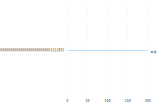

In [66]:
plot(1:size, fieldsnap1)

In [41]:
anim = Animation()

for i = 1:num_snaps
    p = plot(1:size, ez_snapshot[i][2], lab="Ez")
    plot!(1:size, hy_snapshot[i][2], lab="Hy*imp0")
    
    time = ez_snapshot[i][1]
    plot!(ann=[(150, 1.5, "time =$time")])
    plot!(ann=[(0, 1.1, "PEC")])
    plot!(ann=[(180, 1.1, "ABC")])    
    plot!(xlims=(1, 200), ylims=(-2, 2))
    frame(anim, p)
end
gif(anim, "./Task1/ABC_Wdith_200.gif", fps=15)

INFO: Saved animation to /media/storage/Documents/Github/1d-fdtd/tasks/Task1/ABC_Wdith_200.gif


Plots.AnimatedGif("/media/storage/Documents/Github/1d-fdtd/tasks/Task1/ABC_Wdith_200.gif")

# Vacuum with trivial ABC ez[-1] = ez[-2], pulse width = 100
### Setup Grid

In [42]:
#Global parameters
size = 200
endTime = 1000
num_snaps = 200
snap_step = div(endTime, num_snaps)
#Grid
hy = zeros(size);
ez = zeros(size);
# output params
ez_snapshot = Array{Any}(num_snaps);
hy_snapshot = Array{Any}(num_snaps);

fieldsum2 = 1;
sumtime = 800;
fieldsnap2 = zeros(size);

delay = 100;
width = 100;

In [43]:
#Time steps

for time in 1:endTime
    # TFSF Boundary at center
    ez_inc, hy_inc = sources.gaussian_source(100, time, delay, width)  
    
    #
    # Magnetic
    #
    
    # Boundary, Trivial ABC
    boundaries.trivial_abc!(hy, 200)

    # Update
    update.update_magnetic_field!(ez, hy)
    
    # TFSF
    hy[div(length(ez),2)-1] -= hy_inc
    
    #
    # Electric
    #
    
    # Update
    update.update_electric_field!(ez, hy)
    
    # TFSF
    ez[div(length(ez),2)] += ez_inc
    
    # Boundary, PEC
    boundaries.perfect_conductor!(ez, 1)
    
    
    #Catch minimum E-Field
    if time == sumtime
            fieldsum2 = sum(ez.^2)
            fieldsnap2 = copy(ez)
    end
    
    #Snapshots for animation
    if mod(time, snap_step) == 0
        ez_snapshot[div(time,snap_step)] = (time, copy(ez))
        hy_snapshot[div(time,snap_step)] = (time, copy(hy).*globals.imp0)        
    end
    
end
print(fieldsum2)

1.492393255627214e-62

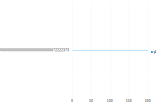

In [44]:
plot(1:size, fieldsnap2)

# Vacuum with trivial ABC ez[-1] = ez[-2], pulse width = 400
### Setup Grid

In [67]:
#Global parameters
size = 200
endTime = 1000
num_snaps = 200
snap_step = div(endTime, num_snaps)
#Grid
hy = zeros(size);
ez = zeros(size);
# output params
ez_snapshot = Array{Any}(num_snaps);
hy_snapshot = Array{Any}(num_snaps);

fieldsum3 = 1;
sumtime = 900;
fieldsnap3 = zeros(size);

delay = 400;
width = 400;

In [68]:
#Time steps

for time in 1:endTime
    # TFSF Boundary at center
    ez_inc, hy_inc = sources.gaussian_source(100, time, delay, width)  
    
    #
    # Magnetic
    #
    
    # Boundary, Trivial ABC
    boundaries.trivial_abc!(hy, 200)

    # Update
    update.update_magnetic_field!(ez, hy)
    
    # TFSF
    hy[div(length(ez),2)-1] -= hy_inc
    
    #
    # Electric
    #
    
    # Update
    update.update_electric_field!(ez, hy)
    
    # TFSF
    ez[div(length(ez),2)] += ez_inc
    
    # Boundary, PEC
    boundaries.perfect_conductor!(ez, 1)
    
    
    #Catch minimum E-Field
    if time == sumtime
            fieldsum3 = sum(ez.^2)
            fieldsnap3 = copy(ez)
    end
    
    #Snapshots for animation
    if mod(time, snap_step) == 0
        ez_snapshot[div(time,snap_step)] = (time, copy(ez))
        hy_snapshot[div(time,snap_step)] = (time, copy(hy).*globals.imp0)        
    end
    
end
print(fieldsum3)

1.2816963179345938e-61

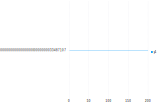

In [69]:
plot(1:size, fieldsnap3)

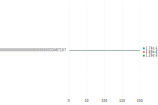

In [70]:
plot(1:size, fieldsnap1, lab=fmt( "1.2e", fieldsum1 ))
plot!(1:size, fieldsnap2, lab=fmt( "1.2e", fieldsum2 ))
plot!(1:size, fieldsnap3, lab=fmt( "1.2e", fieldsum3 ))